In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas_ta as ta

#print(os.getcwd())
df = pd.read_csv('demo/tutorial.csv', delimiter=';')

# replace na with 0
df.fillna(0, inplace=True)

# Create columns volume_weighted bid and ask
df['volume_weighted_bid'] = (df['bid_price_1'] * df['bid_volume_1'] + df['bid_price_2'] * df['bid_volume_2'] + df['bid_price_3'] * df['bid_volume_3']) / (df['bid_volume_1'] + df['bid_volume_2'] + df['bid_volume_3'])
df['volume_weighted_ask'] = (df['ask_price_1'] * df['ask_volume_1'] + df['ask_price_2'] * df['ask_volume_2'] + df['ask_price_3'] * df['ask_volume_3']) / (df['ask_volume_1'] + df['ask_volume_2'] + df['ask_volume_3'])
df['total_bid_volume'] = df['bid_volume_1'] + df['bid_volume_2'] + df['bid_volume_3']
df['total_ask_volume'] = df['ask_volume_1'] + df['ask_volume_2'] + df['ask_volume_3']


# Add a column with the spread
df['spread'] = df['volume_weighted_ask'] - df['volume_weighted_bid']

df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,volume_weighted_bid,volume_weighted_ask,total_bid_volume,total_ask_volume,spread
0,-2,0,AMETHYSTS,10002,1,9996.0,2.0,9995.0,29.0,10004,...,29.0,0.0,0.0,10003.0,0.0,9995.281250,10004.935484,32.0,31.0,9.654234
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,0.0,0.0,5003,...,0.0,0.0,0.0,5002.5,0.0,4997.156250,5003.000000,32.0,31.0,5.843750
2,-2,100,AMETHYSTS,9996,2,9995.0,22.0,0.0,0.0,10004,...,22.0,0.0,0.0,10000.0,0.0,9995.083333,10004.916667,24.0,24.0,9.833333
3,-2,100,STARFRUIT,4997,24,0.0,0.0,0.0,0.0,5003,...,22.0,0.0,0.0,5000.0,0.0,4997.000000,5003.916667,24.0,24.0,6.916667
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,0.0,0.0,5003,...,0.0,0.0,0.0,5000.0,0.0,4996.090909,5003.000000,22.0,20.0,6.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-2,199700,AMETHYSTS,9998,8,9996.0,2.0,9995.0,25.0,10004,...,25.0,0.0,0.0,10001.0,0.0,9995.742857,10004.925926,35.0,27.0,9.183069
3996,-2,199800,STARFRUIT,4949,21,0.0,0.0,0.0,0.0,4956,...,0.0,0.0,0.0,4952.5,0.0,4949.000000,4956.000000,21.0,21.0,7.000000
3997,-2,199800,AMETHYSTS,9995,21,0.0,0.0,0.0,0.0,10002,...,21.0,0.0,0.0,9998.5,0.0,9995.000000,10004.172414,21.0,29.0,9.172414
3998,-2,199900,STARFRUIT,4950,32,0.0,0.0,0.0,0.0,4954,...,32.0,0.0,0.0,4952.0,0.0,4950.000000,4955.641026,32.0,39.0,5.641026


Product:  AMETHYSTS
10000.05375


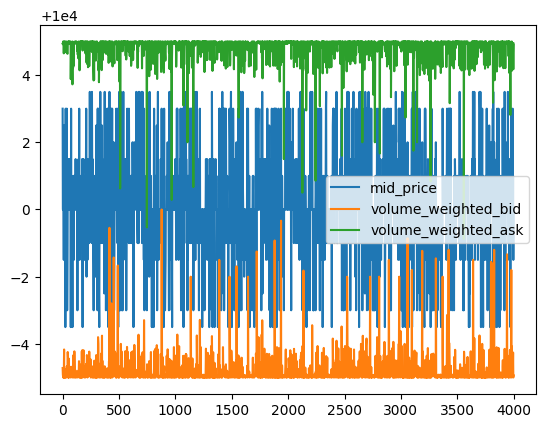

Product:  STARFRUIT
4980.30225


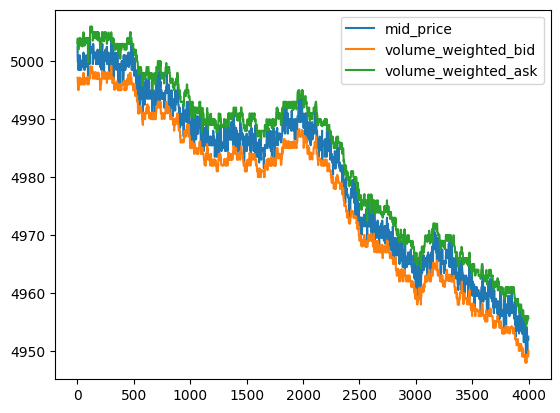

In [2]:
products = df['product'].unique()
products

for product in products:
    p_df = df[df['product'] == product]
    print("Product: ", product) 
    print(p_df['mid_price'].mean())
    
    #Plot the line graph for each product mid_price, mean of bid_price 1, 2, 3 and maean of ask_price 1, 2, 3
    plt.plot(p_df['mid_price'], label='mid_price')
    plt.plot(p_df['volume_weighted_bid'], label='volume_weighted_bid')
    plt.plot(p_df['volume_weighted_ask'], label='volume_weighted_ask')
    plt.legend()
    plt.show()
    
    
    
    
    


C:\Users\yinki\AppData\Local\Temp\ipykernel_18300\1296842027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starfruit_df['MACD'] = starfruit_df['mid_price'].ewm(span=12, adjust=False).mean() - starfruit_df['mid_price'].ewm(span=26, adjust=False).mean()
C:\Users\yinki\AppData\Local\Temp\ipykernel_18300\1296842027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starfruit_df['signal'] = starfruit_df['MACD'].ewm(span=9, adjust=False).mean()
C:\Users\yinki\AppData\Local\Temp\ipykernel_18300\1296842027.p

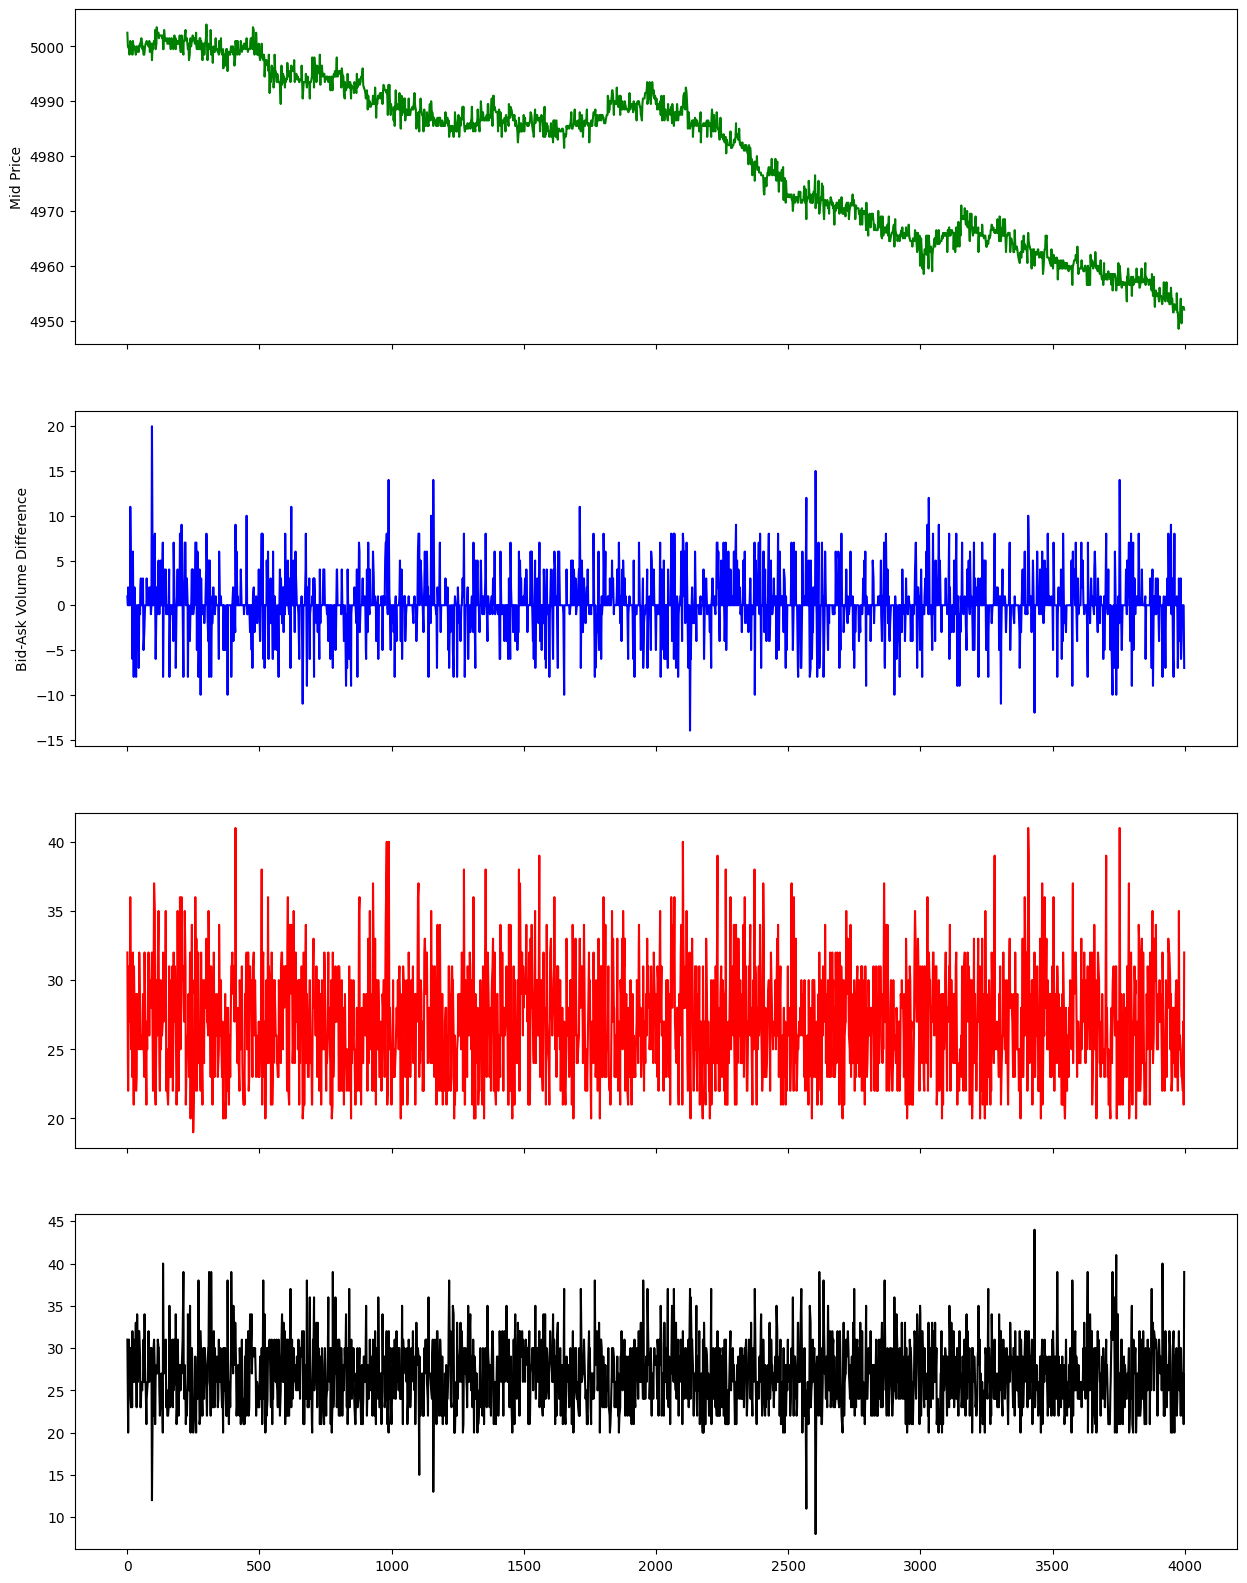

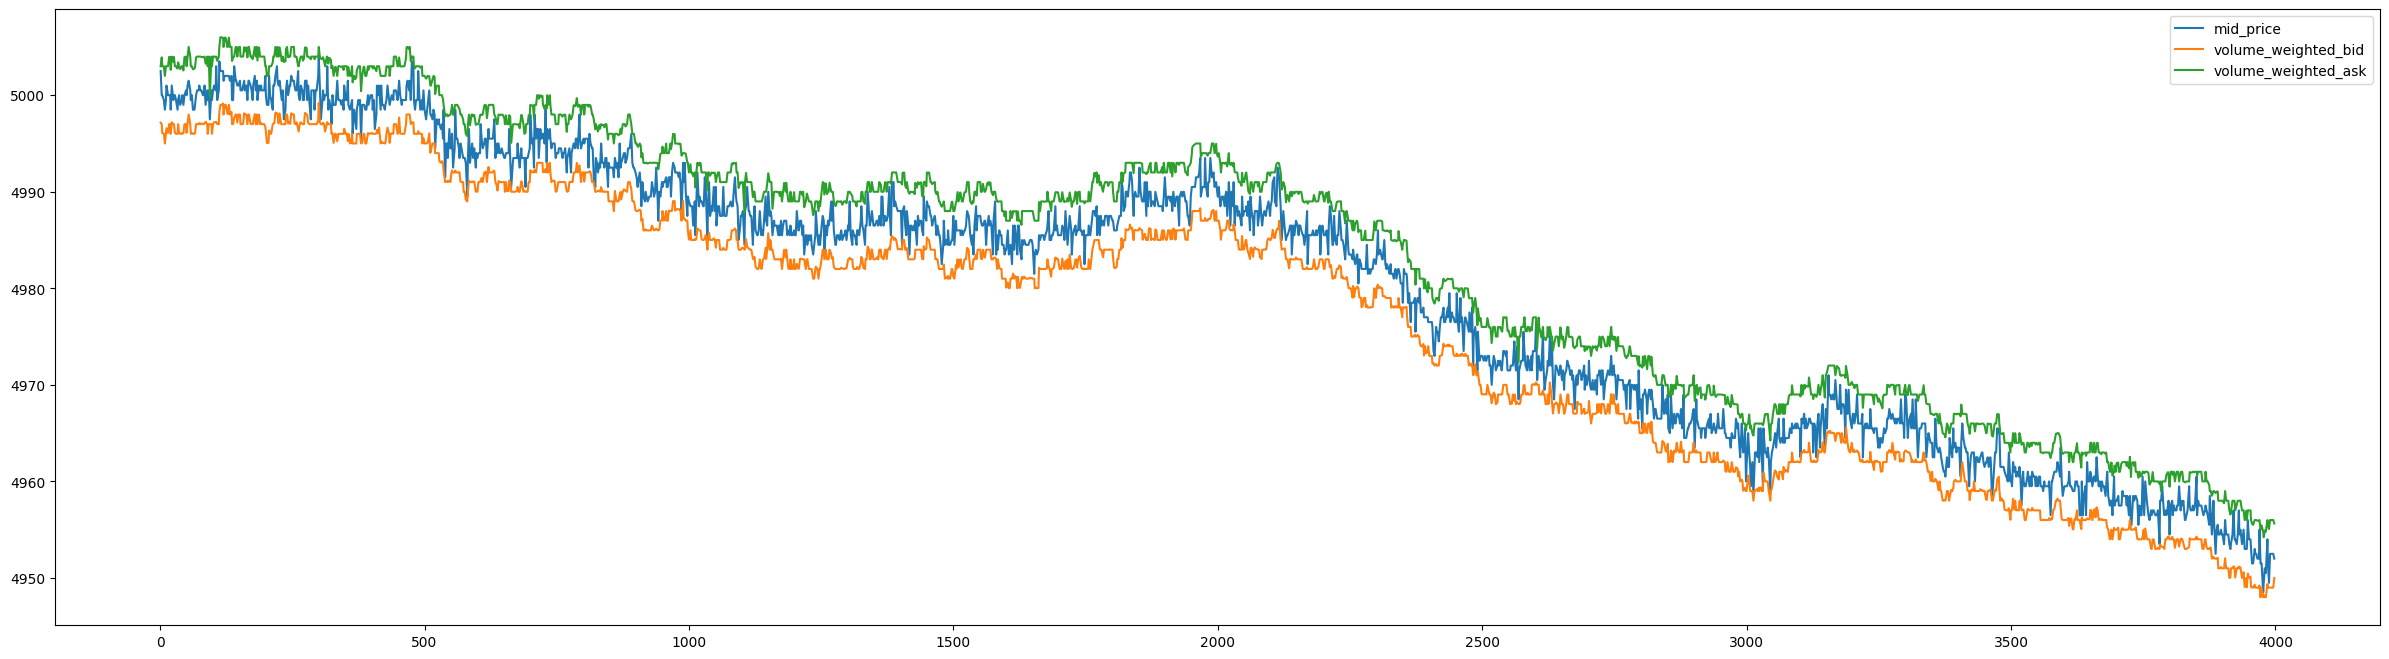

14.271093230320314


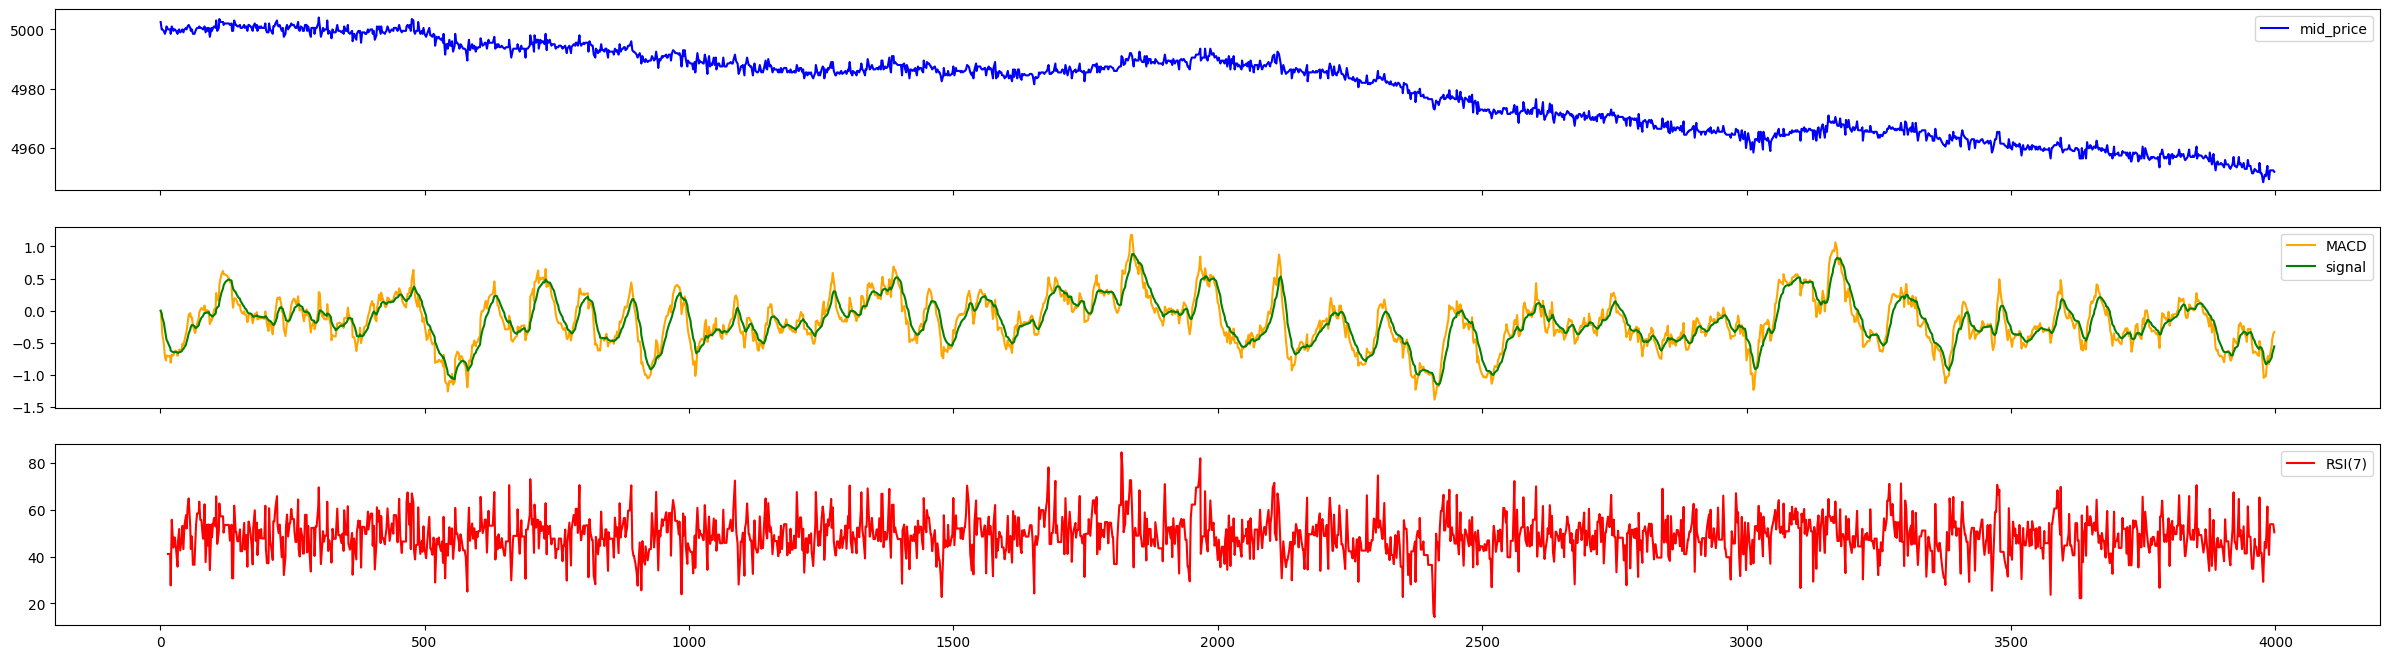

In [3]:
starfruit_df = df[df['product'] == 'STARFRUIT']
starfruit_df['MACD'] = starfruit_df['mid_price'].ewm(span=12, adjust=False).mean() - starfruit_df['mid_price'].ewm(span=26, adjust=False).mean()
starfruit_df['signal'] = starfruit_df['MACD'].ewm(span=9, adjust=False).mean()
starfruit_df['RSI(14)'] = ta.rsi(starfruit_df['mid_price'], length=14)
starfruit_df['RSI(7)'] = ta.rsi(starfruit_df['mid_price'], length=7)

# Create figure and axes for the two subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(15, 20))

# Plot mid price on the first subplot
ax1.plot(starfruit_df.index, starfruit_df['mid_price'], color='green')
ax1.set_ylabel('Mid Price')

# Plot the difference between total bid volume and total ask volume on the second subplot
ax2.plot(starfruit_df.index, starfruit_df['total_bid_volume'] - starfruit_df['total_ask_volume'], color='blue')
ax2.set_ylabel('Bid-Ask Volume Difference')

# Plot the difference between total bid volume and total ask volume on the second subplot
ax3.plot(starfruit_df.index, starfruit_df['total_bid_volume'], color='red')

ax4.plot(starfruit_df.index, starfruit_df['total_ask_volume'], color='black')

# Show the plot
plt.show()

fig, ax = plt.subplots(figsize=(30, 8))
plt.plot(starfruit_df['mid_price'], label='mid_price')
plt.plot(starfruit_df['volume_weighted_bid'], label='volume_weighted_bid')
plt.plot(starfruit_df['volume_weighted_ask'], label='volume_weighted_ask')
plt.legend()
plt.show()


print(starfruit_df['mid_price'].std())


period1 = starfruit_df.iloc[:]
# Print MACD and signal with the mid_price above
# Create two subplots, one for mid_price and one for MACD and signal
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30, 8), sharex=True)

# Plot mid_price on the first subplot
ax1.plot(period1.index, period1['mid_price'], label='mid_price', color='blue')
ax1.legend()

# Plot MACD on the second subplot
ax2.plot(period1.index, period1['MACD'], label='MACD', color='orange')
ax2.legend()

# Plot signal on the second subplot
ax2.plot(period1.index, period1['signal'], label='signal', color='green')
ax2.legend()


ax3.plot(period1.index, period1['RSI(7)'], label='RSI(7)', color='red')
ax3.legend()
plt.show()



In [4]:
starfruit_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,profit_and_loss,volume_weighted_bid,volume_weighted_ask,total_bid_volume,total_ask_volume,spread,MACD,signal,RSI(14),RSI(7)
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,0.0,0.0,5003,...,0.0,4997.156250,5003.000000,32.0,31.0,5.843750,0.000000,0.000000,NaN,NaN
3,-2,100,STARFRUIT,4997,24,0.0,0.0,0.0,0.0,5003,...,0.0,4997.000000,5003.916667,24.0,24.0,6.916667,-0.199430,-0.039886,NaN,NaN
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,0.0,0.0,5003,...,0.0,4996.090909,5003.000000,22.0,20.0,6.909091,-0.353406,-0.102590,NaN,NaN
7,-2,300,STARFRUIT,4996,31,0.0,0.0,0.0,0.0,5003,...,0.0,4996.000000,5003.000000,31.0,31.0,7.000000,-0.509901,-0.184052,NaN,NaN
9,-2,400,STARFRUIT,4995,27,0.0,0.0,0.0,0.0,5002,...,0.0,4995.000000,5002.000000,27.0,27.0,7.000000,-0.706473,-0.288536,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,-2,199500,STARFRUIT,4949,23,0.0,0.0,0.0,0.0,4956,...,0.0,4949.000000,4956.000000,23.0,23.0,7.000000,-0.678682,-0.774384,50.518869,53.876456
3993,-2,199600,STARFRUIT,4949,22,0.0,0.0,0.0,0.0,4956,...,0.0,4949.000000,4956.000000,22.0,22.0,7.000000,-0.553190,-0.730145,50.518869,53.876456
3994,-2,199700,STARFRUIT,4949,27,0.0,0.0,0.0,0.0,4956,...,0.0,4949.000000,4956.000000,27.0,27.0,7.000000,-0.448566,-0.673829,50.518869,53.876456
3996,-2,199800,STARFRUIT,4949,21,0.0,0.0,0.0,0.0,4956,...,0.0,4949.000000,4956.000000,21.0,21.0,7.000000,-0.361484,-0.611360,50.518869,53.876456


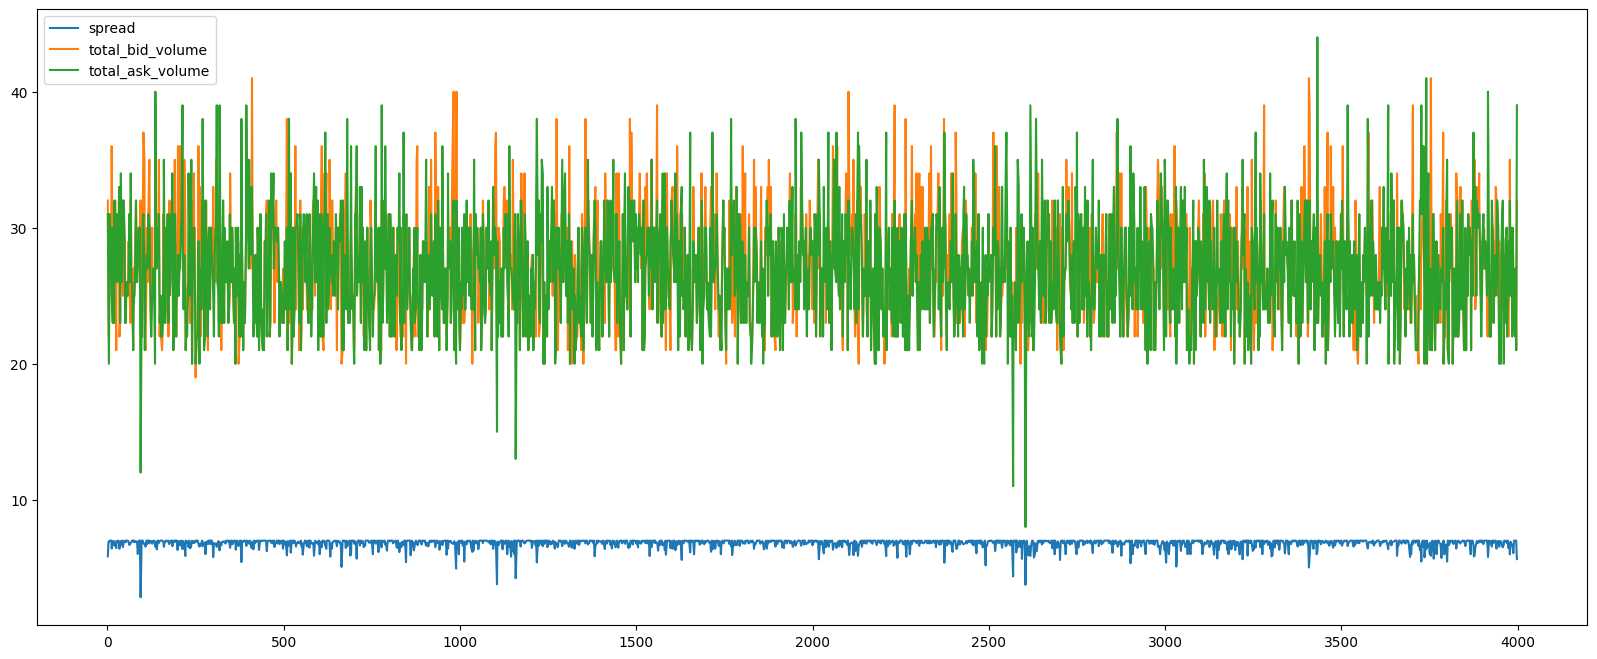

Average Spread: 6.80087934821045
Standard Deviation Spread: 0.32866856958867025


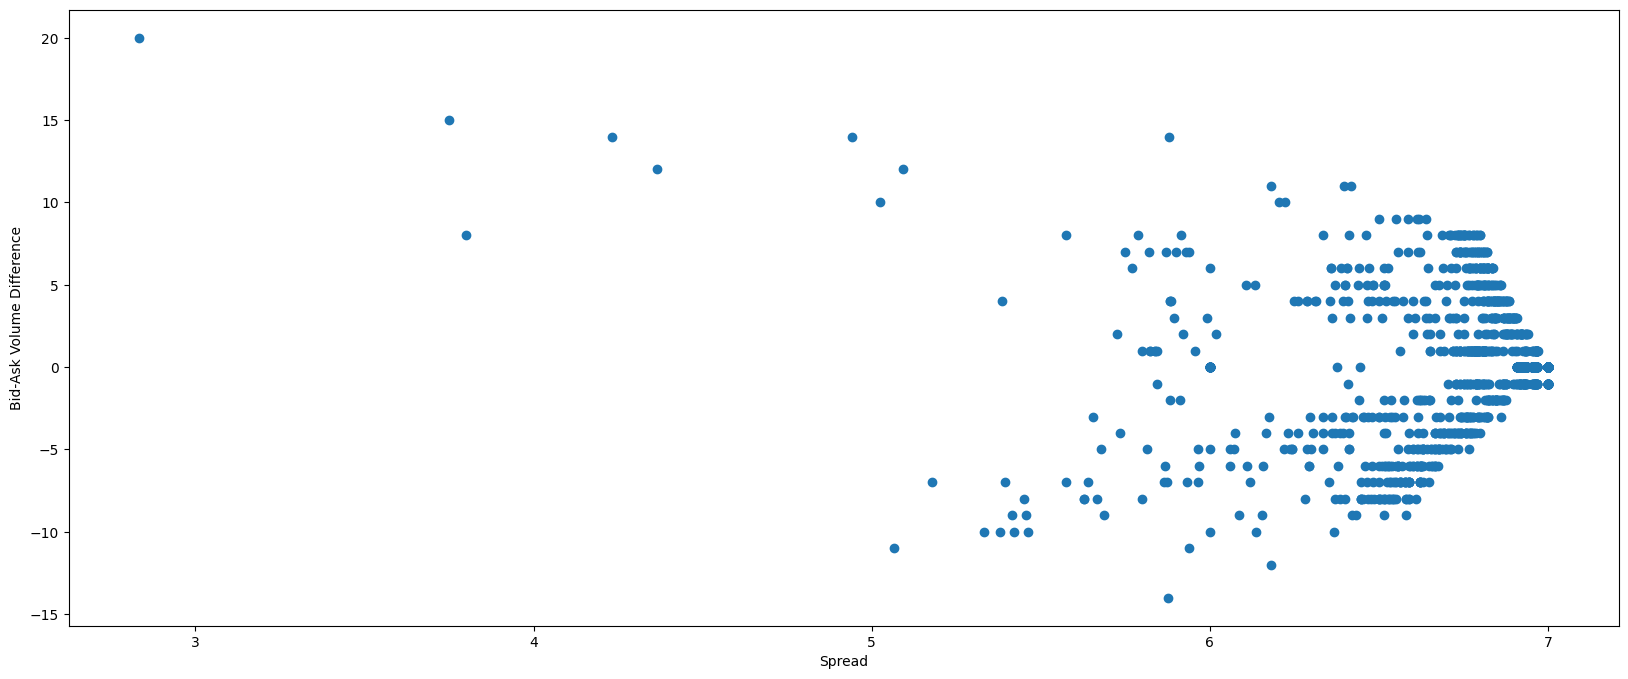

In [5]:
# Descriptive Statistics , finding mid_price, spread and volume 

# Plot spread and volume
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(starfruit_df['spread'], label='spread')
plt.plot(starfruit_df['total_bid_volume'], label='total_bid_volume')
plt.plot(starfruit_df['total_ask_volume'], label='total_ask_volume')
plt.legend()
plt.show()

# Average spread
print("Average Spread: " + str(starfruit_df['spread'].mean()))
print("Standard Deviation Spread: " + str(starfruit_df['spread'].std()))


# Plot the spread against difference in bid and ask volume
fig, ax = plt.subplots(figsize=(20, 8))
plt.scatter(starfruit_df['spread'], starfruit_df['total_bid_volume'] - starfruit_df['total_ask_volume'])
plt.xlabel('Spread')
plt.ylabel('Bid-Ask Volume Difference')
plt.show()


        

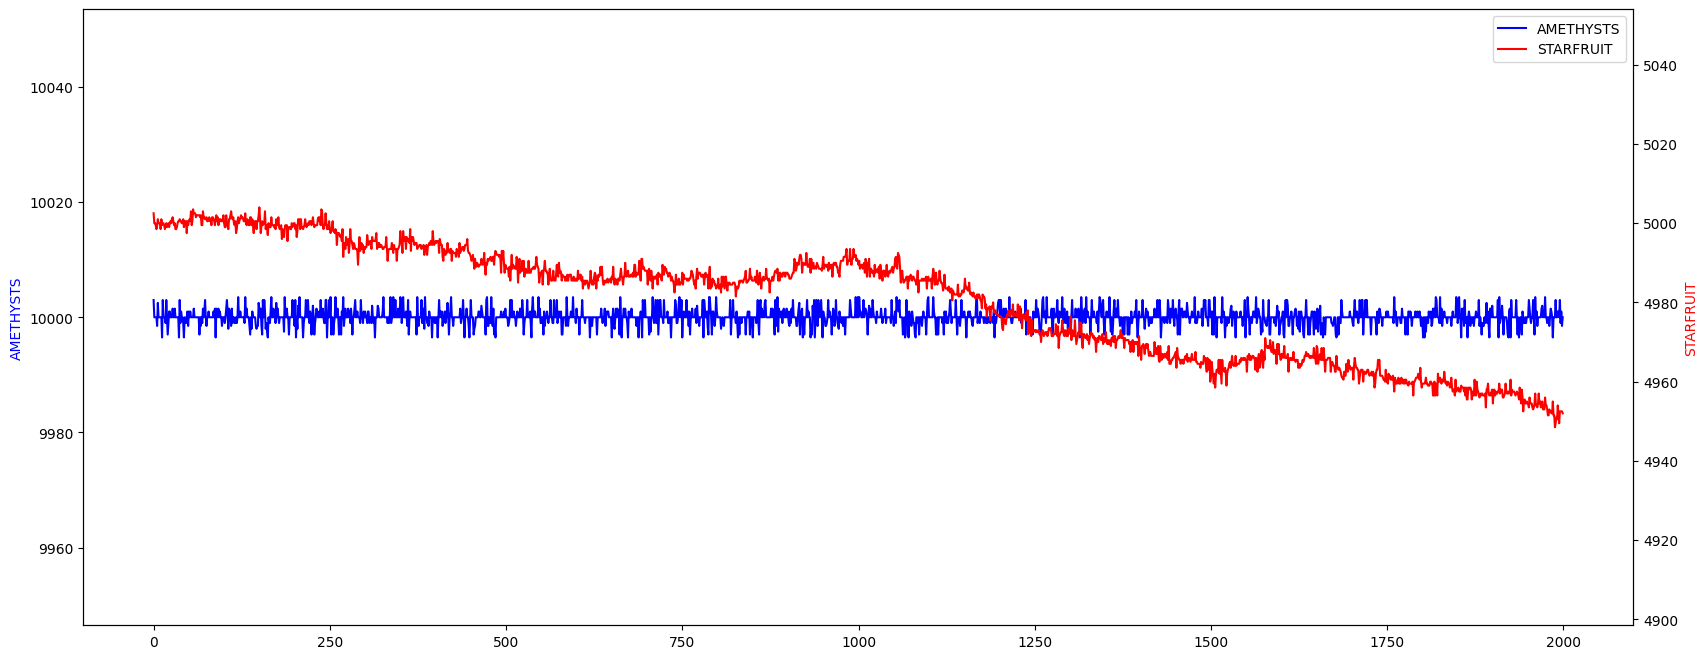

In [6]:
# Pipeline for Pairs Trading
#print(os.getcwd())
from statsmodels.tsa.stattools import coint
import pandas as pd


df = pd.read_csv('demo/tutorial.csv', delimiter=';')

# replace na with 0
df.fillna(0, inplace=True)

# Create columns volume_weighted bid and ask
df['volume_weighted_bid'] = (df['bid_price_1'] * df['bid_volume_1'] + df['bid_price_2'] * df['bid_volume_2'] + df['bid_price_3'] * df['bid_volume_3']) / (df['bid_volume_1'] + df['bid_volume_2'] + df['bid_volume_3'])
df['volume_weighted_ask'] = (df['ask_price_1'] * df['ask_volume_1'] + df['ask_price_2'] * df['ask_volume_2'] + df['ask_price_3'] * df['ask_volume_3']) / (df['ask_volume_1'] + df['ask_volume_2'] + df['ask_volume_3'])
df['total_bid_volume'] = df['bid_volume_1'] + df['bid_volume_2'] + df['bid_volume_3']
df['total_ask_volume'] = df['ask_volume_1'] + df['ask_volume_2'] + df['ask_volume_3']

product1, product2 = 'AMETHYSTS', 'STARFRUIT'
p1_df = df[df['product'] == product1].reset_index(drop=True)
p2_df = df[df['product'] == product2].reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=(20, 8))

# Plot both mid prices on the same plot
ax1.plot(p1_df['mid_price'], label=product1, color='blue')
ax1.set_ylabel(product1, color='blue')

# Create a twin axes sharing the x-axis
ax2 = ax1.twinx()

ax2.plot(p2_df['mid_price'], label=product2, color='red')
ax2.set_ylabel(product2, color='red')

# Adjust y-axis limits for each product
min1, max1 = p1_df['mid_price'].min(), p1_df['mid_price'].max()
min2, max2 = p2_df['mid_price'].min(), p2_df['mid_price'].max()
ax1.set_ylim(min1 - 50, max1 + 50)  # Set limits for product1
ax2.set_ylim(min2 - 50, max2 + 50)    # Set limits for product2

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Show the plot
plt.show()


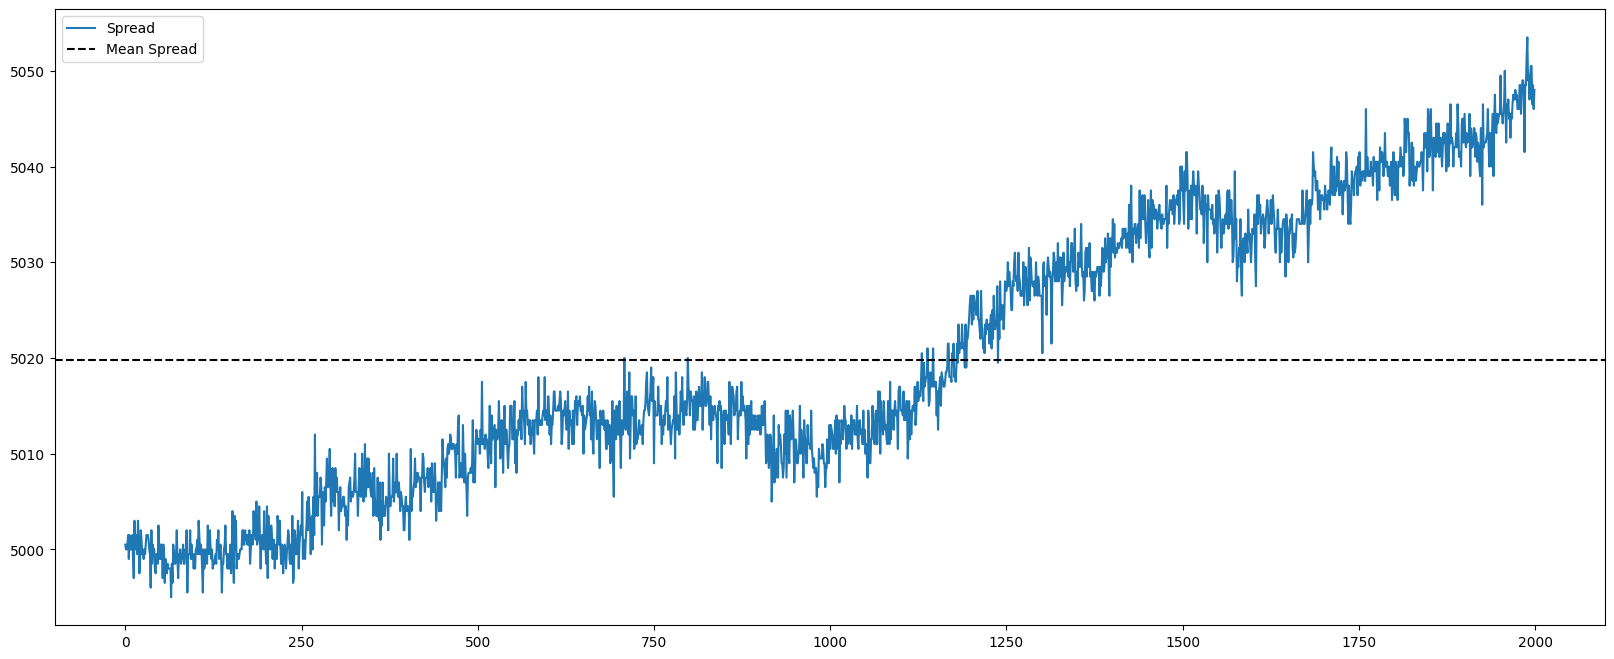

Cointegration Test P-Value: 0.000000
Standard Deviation of Spread: 14.295293822189572
ADF P-Value: 0.970656
Regression Formula:
const        1555.531176
mid_price       0.342475
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              mid_price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.528
Date:                Wed, 27 Mar 2024   Prob (F-statistic):              0.112
Time:                        20:57:06   Log-Likelihood:                -8152.6
No. Observations:                2000   AIC:                         1.631e+04
Df Residuals:                    1998   BIC:                         1.632e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 

In [7]:
# Plot the spread
fig, ax = plt.subplots(figsize=(20, 8))
spread = p1_df['mid_price'] - p2_df['mid_price']
plt.plot(spread, label='Spread')
plt.axhline(spread.mean(), color='black', linestyle='--', label='Mean Spread')
plt.legend()
plt.show()

print('Cointegration Test P-Value: %f' % coint(p1_df['mid_price'], p2_df['mid_price'])[1])
print(f"Standard Deviation of Spread: {spread.std()}")

# ADF Fuller on Stationarity of Spread Time Series
from statsmodels.tsa.stattools import adfuller

result = adfuller(spread)
print('ADF P-Value: %f' % result[1])


# OLS Regression on the 2 Products
import statsmodels.api as sm

X = p1_df['mid_price']
y = p2_df['mid_price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

# Print out the formula
print("Regression Formula:")
print(model.params)
print(model.summary())

In [8]:
X = pd.DataFrame(p2_df['mid_price'])
n = 10
for i in range(1, n+1):
    curr_cols = X.columns   
    X = pd.concat([X, p2_df['mid_price'].shift(i)], axis=1) # Shift the mid price by i periods and concatenate to X # change column name
    X.columns = curr_cols.append(pd.Index([f'lag_{i}'])) # Change the column name to lag_i
X.dropna(inplace=True)
X = X.reset_index(drop=True) # Drop the rows with NaN values
X.head(20)
    
    

    


,mid_price,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
0,4998.5,5000.0,5000.0,5000.0,5001.0,4999.5,4998.5,4999.5,5000.0,5000.0,5002.5
1,5001.0,4998.5,5000.0,5000.0,5000.0,5001.0,4999.5,4998.5,4999.5,5000.0,5000.0
2,4999.5,5001.0,4998.5,5000.0,5000.0,5000.0,5001.0,4999.5,4998.5,4999.5,5000.0
3,5000.0,4999.5,5001.0,4998.5,5000.0,5000.0,5000.0,5001.0,4999.5,4998.5,4999.5
4,5000.0,5000.0,4999.5,5001.0,4998.5,5000.0,5000.0,5000.0,5001.0,4999.5,4998.5
5,4999.5,5000.0,5000.0,4999.5,5001.0,4998.5,5000.0,5000.0,5000.0,5001.0,4999.5
6,4998.5,4999.5,5000.0,5000.0,4999.5,5001.0,4998.5,5000.0,5000.0,5000.0,5001.0
7,4999.5,4998.5,4999.5,5000.0,5000.0,4999.5,5001.0,4998.5,5000.0,5000.0,5000.0
8,5000.0,4999.5,4998.5,4999.5,5000.0,5000.0,4999.5,5001.0,4998.5,5000.0,5000.0
9,4999.0,5000.0,4999.5,4998.5,4999.5,5000.0,5000.0,4999.5,5001.0,4998.5,5000.0


n=1, mse=2.640106448803891
n=1, rsquared=0.8482012467699829
n=2, mse=2.1436243581169387
n=2, rsquared=0.8767475814836669
n=3, mse=1.8858988729138095
n=3, rsquared=0.8915660776648193
n=4, mse=1.851482849920222
n=4, rsquared=0.8933408015598242
n=5, mse=1.8077525334044953
n=5, rsquared=0.8958599934104555
n=6, mse=1.788021041147624
n=6, rsquared=0.8969966742866716
n=7, mse=1.7804424635112777
n=7, rsquared=0.8974332567892015
n=8, mse=1.770623007815913
n=8, rsquared=0.8979989305536825
n=9, mse=1.7489293263884322
n=9, rsquared=0.8987739412006299
n=10, mse=1.74702065505056
n=10, rsquared=0.8988844129470641
n=11, mse=1.7481854313539533
n=11, rsquared=0.8988169970070393
n=12, mse=1.7561286298071919
n=12, rsquared=0.8983572536305914
n=13, mse=1.757627750098525
n=13, rsquared=0.8982704862372679
n=14, mse=1.7782677930266477
n=14, rsquared=0.8965823599921858
n=15, mse=1.779074519318087
n=15, rsquared=0.89653544370122
n=16, mse=1.7764356010652085
n=16, rsquared=0.8966889136673052
n=17, mse=1.77247326

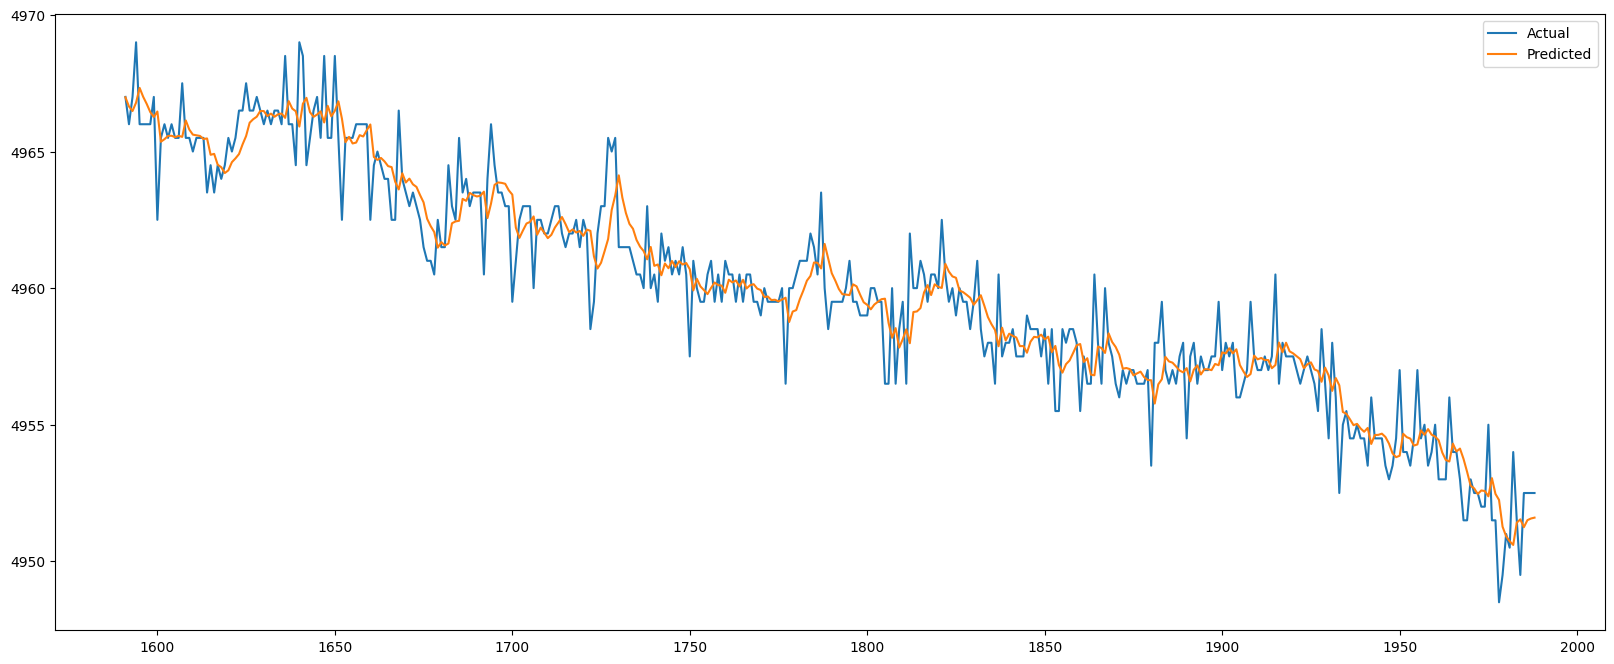

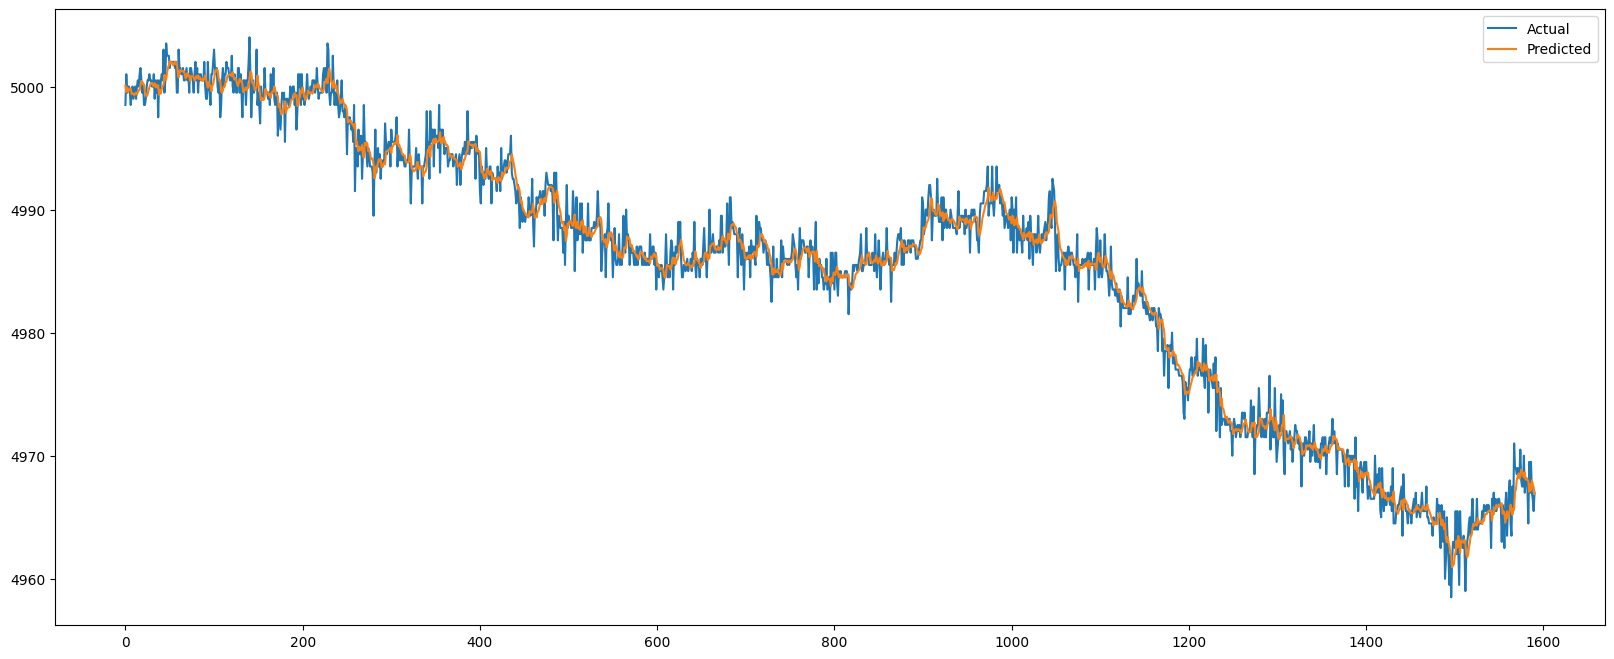

Percentage of times the predicted change same direction as the actual change: 0.5402010050251256
Percentage of times the predicted change same direction as the actual change in Train: 0.5587680703959774
{1: 0.3625, 2: 0.5125, 3: 0.5075, 4: 0.5363408521303258, 5: 0.5363408521303258, 6: 0.5388471177944862, 7: 0.5288220551378446, 8: 0.5388471177944862, 9: 0.5452261306532663, 10: 0.5402010050251256, 11: 0.5402010050251256, 12: 0.5477386934673367, 13: 0.550251256281407, 14: 0.5440806045340051, 15: 0.5440806045340051, 16: 0.5491183879093199, 17: 0.5491183879093199, 18: 0.5516372795969773, 19: 0.5505050505050505}


In [9]:
# Using Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


CURR_MIN = 10000000
Y_PRED = None
CURR_N = 0
Y_TEST = None
best_coef = None
model_intercept = None
Y_TRAIN = None
Y_TRAIN_PRED = None
# Using Grid Search to find the best parameters for Xt = bXt-1 + cXt-2 + ... + dXt-n + e, where n is the number of lags, and Xt is itself
directional_accuracy = {}
for n in range(1, 20):
    X = pd.DataFrame(p2_df['mid_price'])
    for i in range(1, n+1):
        curr_cols = X.columns   
        X = pd.concat([X, p2_df['mid_price'].shift(i)], axis=1) # Shift the mid price by i periods and concatenate to X # change column name
        X.columns = curr_cols.append(pd.Index([f'lag_{i}'])) # Change the column name to lag_i
    X = X.shift(1)
    X.dropna(inplace=True)
    X = X.reset_index(drop=True) # Drop the rows with NaN values
    y = X['mid_price']
    X = X.iloc[:, 1:]
    
    #print(X.head())
    #print(y.head())
    #print(X.shape, y.shape)
    # Add a constant to the X matrix
    X = sm.add_constant(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = LinearRegression()
    model.fit(X_train, y_train)
    #print(f"X Coefficients: ")
    #print(model.coef_)
    #print(f"X Intercept: ")
    #print(model.intercept_)
    
    
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rsquared = model.score(X_test, y_test)
    
    
    print(f"n={n}, mse={mse}")
    print(f"n={n}, rsquared={rsquared}")
    count = 0
    y_pred = pd.Series(y_pred)
    y_pred.index = y_test.index
    for i in range(1, len(y_test)):
        if (y_test.iloc[i] -y_test.iloc[i-1]) * (y_pred.iloc[i] - y_test.iloc[i-1]) > 0:
            count += 1
    directional_accuracy[n] = count/len(y_test)
    
    
    if mse < CURR_MIN:
        CURR_MIN = mse
        CURR_N = n
        Y_PRED = y_pred
        Y_TEST = y_test
        best_coef = model.coef_
        Y_TRAIN = y_train
        Y_TRAIN_PRED = y_pred_train
        model_intercept = model.intercept_
        #print(y)
        #print(X)
        

print(f"Best n: {CURR_N}, Best MSE: {CURR_MIN}")
print(f"Best Coefficients: {best_coef}")
print(f"Model Intercept: {model.intercept_}")
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(Y_TEST, label='Actual')
plt.plot(Y_PRED, label='Predicted')
plt.legend()
plt.show()




fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(Y_TRAIN, label='Actual')
plt.plot(Y_TRAIN_PRED, label='Predicted')
plt.legend()
plt.show()


# Count the number of times the predicted change same direction as the actual change
count = 0
for i in range(1, len(Y_TEST)):
    if (Y_TEST.iloc[i] - Y_TEST.iloc[i-1]) * (Y_PRED.iloc[i] - Y_TEST.iloc[i-1]) > 0:
        count += 1
        
print(f"Percentage of times the predicted change same direction as the actual change: {count/len(Y_TEST)}")
count = 0
for i in range(1, len(Y_TRAIN)):
    if (Y_TRAIN.iloc[i] - Y_TRAIN.iloc[i-1]) * (Y_TRAIN_PRED[i] - Y_TRAIN.iloc[i-1]) > 0:
        count += 1
        
print(f"Percentage of times the predicted change same direction as the actual change in Train: {count/len(Y_TRAIN)}")
print(directional_accuracy)